In [42]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [43]:
# Ορισμός της χρονικής περιόδου
start = '2010-01-01'
end = '2023-12-31'

# Ανάκτηση δεδομένων χρησιμοποιώντας το yfinance
aapl = yf.Ticker("AAPL")
df = aapl.history(start=start, end=end)

# Εμφάνιση των πρώτων γραμμών του DataFrame
print(df.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-01-04 00:00:00-05:00  6.461438  6.493832  6.429650  6.478997  493729600   
2010-01-05 00:00:00-05:00  6.496860  6.526831  6.455989  6.490199  601904800   
2010-01-06 00:00:00-05:00  6.490200  6.515933  6.380304  6.386965  552160000   
2010-01-07 00:00:00-05:00  6.410578  6.418147  6.328837  6.375157  477131200   
2010-01-08 00:00:00-05:00  6.366678  6.418145  6.329139  6.417539  447610800   

                           Dividends  Stock Splits  
Date                                                
2010-01-04 00:00:00-05:00        0.0           0.0  
2010-01-05 00:00:00-05:00        0.0           0.0  
2010-01-06 00:00:00-05:00        0.0           0.0  
2010-01-07 00:00:00-05:00        0.0           0.0  
2010-01-08 00:00:00-05:00        0.0           0.0  


/root/jupyterlab_venv/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [44]:
if 'Adj Close' in df.columns:
    df = df.drop('Adj Close', axis=1)

# Εμφάνιση των πρώτων γραμμών μετά την αφαίρεση της στήλης
print(df.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-01-04 00:00:00-05:00  6.461438  6.493832  6.429650  6.478997  493729600   
2010-01-05 00:00:00-05:00  6.496860  6.526831  6.455989  6.490199  601904800   
2010-01-06 00:00:00-05:00  6.490200  6.515933  6.380304  6.386965  552160000   
2010-01-07 00:00:00-05:00  6.410578  6.418147  6.328837  6.375157  477131200   
2010-01-08 00:00:00-05:00  6.366678  6.418145  6.329139  6.417539  447610800   

                           Dividends  Stock Splits  
Date                                                
2010-01-04 00:00:00-05:00        0.0           0.0  
2010-01-05 00:00:00-05:00        0.0           0.0  
2010-01-06 00:00:00-05:00        0.0           0.0  
2010-01-07 00:00:00-05:00        0.0           0.0  
2010-01-08 00:00:00-05:00        0.0           0.0  


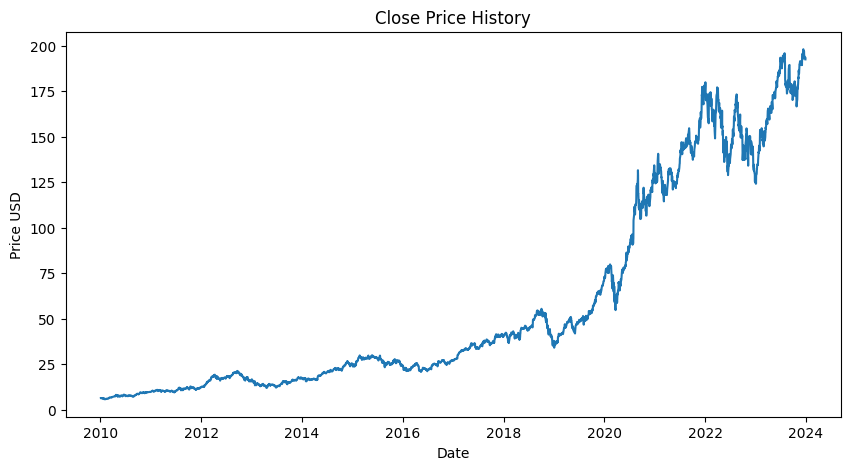

In [45]:
# Απεικόνιση της στήλης 'Close' χρησιμοποιώντας το matplotlib
plt.figure(figsize=(10,5))
plt.plot(df['Close'])
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price USD')
plt.show()

In [46]:
ma100 = df.Close.rolling(100).mean()
ma100

Date
2010-01-04 00:00:00-05:00           NaN
2010-01-05 00:00:00-05:00           NaN
2010-01-06 00:00:00-05:00           NaN
2010-01-07 00:00:00-05:00           NaN
2010-01-08 00:00:00-05:00           NaN
                                ...    
2023-12-22 00:00:00-05:00    181.590315
2023-12-26 00:00:00-05:00    181.614205
2023-12-27 00:00:00-05:00    181.730650
2023-12-28 00:00:00-05:00    181.882712
2023-12-29 00:00:00-05:00    182.014799
Name: Close, Length: 3522, dtype: float64

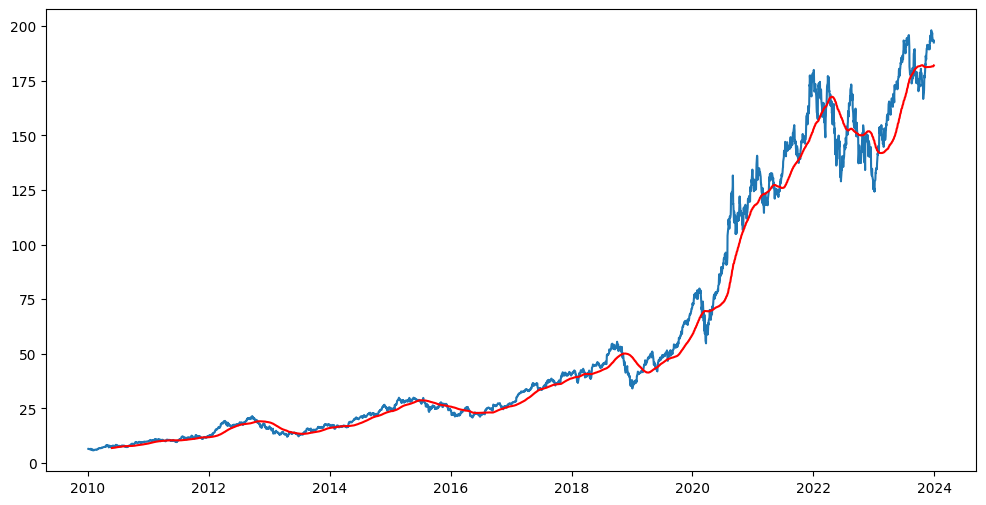

In [47]:
plt.figure (figsize = (12,6))
plt.plot(df.Close)
plt.plot (ma100, 'r')

In [48]:
ma200 = df. Close.rolling (200).mean()
ma200

Date
2010-01-04 00:00:00-05:00           NaN
2010-01-05 00:00:00-05:00           NaN
2010-01-06 00:00:00-05:00           NaN
2010-01-07 00:00:00-05:00           NaN
2010-01-08 00:00:00-05:00           NaN
                                ...    
2023-12-22 00:00:00-05:00    178.276934
2023-12-26 00:00:00-05:00    178.502683
2023-12-27 00:00:00-05:00    178.719123
2023-12-28 00:00:00-05:00    178.927155
2023-12-29 00:00:00-05:00    179.127946
Name: Close, Length: 3522, dtype: float64

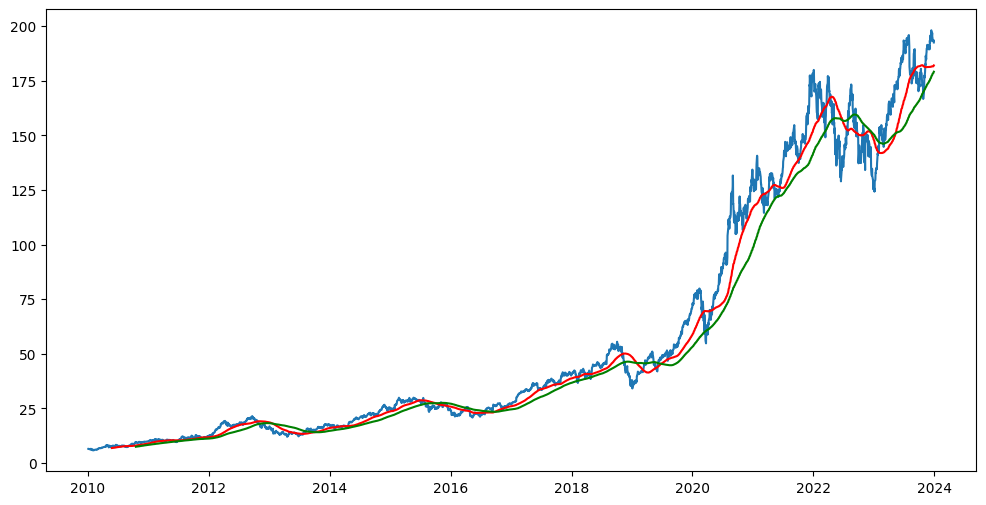

In [49]:
plt.figure(figsize= (12,6))
plt.plot (df. Close)
plt.plot (ma100, 'r')
plt.plot (ma200, 'g')

In [50]:
df.shape

(3522, 7)

In [51]:
data_training = pd.DataFrame (df [ 'Close'][0:int(len (df)*0.70)])
data_testing= pd.DataFrame(df [ 'Close' ][int(len (df) *0.70): int(len (df))])
print (data_training.shape)
print(data_testing.shape)

(2465, 1)
(1057, 1)


In [52]:
data_training.head()

,Close
Date,
2010-01-04 00:00:00-05:00,6.478997
2010-01-05 00:00:00-05:00,6.490199
2010-01-06 00:00:00-05:00,6.386965
2010-01-07 00:00:00-05:00,6.375157
2010-01-08 00:00:00-05:00,6.417539


In [53]:
data_testing.head()

,Close
Date,
2019-10-18 00:00:00-04:00,57.407196
2019-10-21 00:00:00-04:00,58.402794
2019-10-22 00:00:00-04:00,58.269241
2019-10-23 00:00:00-04:00,59.051144
2019-10-24 00:00:00-04:00,59.148277


In [54]:
scaler = MinMaxScaler (feature_range=(0,1))

In [55]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01289801],
       [0.01311533],
       [0.01111251],
       ...,
       [0.99580716],
       [0.99133168],
       [0.99561873]])

In [56]:
data_training_array.shape

(2465, 1)

In [57]:
x_train = []
y_train = []
for i in range (100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
x_train, y_train= np.array(x_train), np.array(y_train)

In [58]:
# ML Model

In [59]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=1))

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [61]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
74/74 [==============================] - 15s 136ms/step - loss: 0.0285
Epoch 2/50
74/74 [==============================] - 11s 145ms/step - loss: 0.0057
Epoch 3/50
74/74 [==============================] - 11s 146ms/step - loss: 0.0052
Epoch 4/50
74/74 [==============================] - 10s 141ms/step - loss: 0.0046
Epoch 5/50
74/74 [==============================] - 10s 138ms/step - loss: 0.0040
Epoch 6/50
74/74 [==============================] - 11s 146ms/step - loss: 0.0035
Epoch 7/50
74/74 [==============================] - 10s 137ms/step - loss: 0.0034
Epoch 8/50
74/74 [==============================] - 10s 139ms/step - loss: 0.0031
Epoch 9/50
74/74 [==============================] - 11s 144ms/step - loss: 0.0029
Epoch 10/50
74/74 [==============================] - 11s 145ms/step - loss: 0.0035
Epoch 11/50
74/74 [==============================] - 11s 148ms/step - loss: 0.0034
Epoch 12/50
74/74 [==============================] - 11s 142ms/step - loss: 0.0030
Epoch 13/50
7

In [62]:
model.save('keras_model.h5')

/root/jupyterlab_venv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [63]:
data_testing.head()

,Close
Date,
2019-10-18 00:00:00-04:00,57.407196
2019-10-21 00:00:00-04:00,58.402794
2019-10-22 00:00:00-04:00,58.269241
2019-10-23 00:00:00-04:00,59.051144
2019-10-24 00:00:00-04:00,59.148277


In [64]:
data_training.tail(100)

,Close
Date,
2019-05-29 00:00:00-04:00,42.909969
2019-05-30 00:00:00-04:00,43.132515
2019-05-31 00:00:00-04:00,42.351158
2019-06-03 00:00:00-04:00,41.922977
2019-06-04 00:00:00-04:00,43.456680
...,...
2019-10-11 00:00:00-04:00,57.358627
2019-10-14 00:00:00-04:00,57.276077
2019-10-15 00:00:00-04:00,57.142509


In [65]:
past_100_days = data_training.tail(100)

In [66]:
final_df = pd.concat([data_training, data_testing], ignore_index=True)

In [67]:
final_df.head()

,Close
0,6.478997
1,6.490199
2,6.386965
3,6.375157
4,6.417539


In [68]:
input_data = scaler. fit_transform(final_df)
input_data

array([[0.00345728],
       [0.00351553],
       [0.00297868],
       ...,
       [0.97420637],
       [0.97644255],
       [0.9709822 ]])

In [69]:
input_data.shape

(3522, 1)

In [70]:
x_test = []
y_test = []

for i in range (100, input_data.shape [0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [71]:
x_test, y_test = np.array(x_test), np.array(y_test)
print (x_test.shape)
print (y_test.shape)

(3422, 100, 1)
(3422,)


In [ ]:
# Making Predictions

y_predicted = model.predict (x_test)

 62/107 [================>.............] - ETA: 1s

In [ ]:
y_predicted.shape

In [ ]:
y_test

In [35]:
scaler.scale_

array([0.00520032])

In [36]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

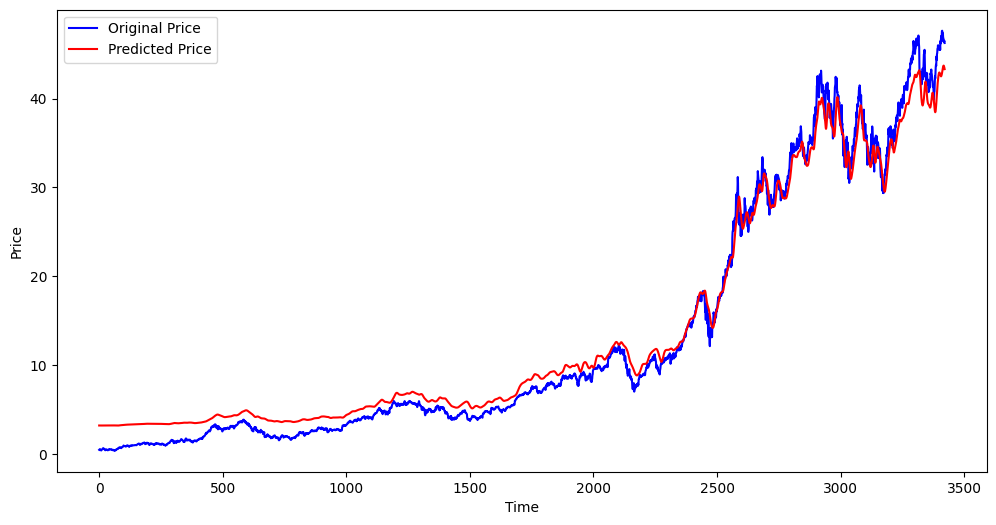

In [37]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()